In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import ToolBox as tb

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
X = pd.read_csv('data\clean_data\clean_features.csv') # cargamos los datos limpios
y = pd.read_csv('data/clean_data/clean_target_gradeClass.csv')['GradeClass'] # cargamos los datos de target limpios

In [5]:
info_col={'StudentID': 'A unique identifier assigned to each student (1001 to 3392).',
                    'Age': 'The age of the students ranges from 15 to 18 years.',
                    'Gender': ' Gender of the students, where 0 represents Male and 1 represents Female.',
                    'Ethnicity': ' The ethnicity of the students, coded as \n 0: Caucasian \n 1: African American \n 2: Asian \n 3: Other',
                    'ParentalEducation': "The education level of the parents, coded as \n 0: None \n 1: High School \n 2: Some College \n 3: Bachelor's \n 4: Higher",
                    'StudyTimeWeekly': 'Weekly study time in hours, ranging from 0 to 20.',
                    'Absences': 'Number of absences during the school year, ranging from 0 to 30.',
                    'Tutoring': 'Tutoring status, where 0 indicates No and 1 indicates Yes.',
                    'ParentalSupport': 'The level of parental support, coded as \n 0: None \n 1: Low \n 2: Moderate \n 3: High \n 4: Very High',
                    'Extracurricular': 'Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.',
                    'Sports': 'Participation in sports, where 0 indicates No and 1 indicates Yes.',
                    'Music': 'Participation in music activities, where 0 indicates No and 1 indicates Yes.',
                    'Volunteering': 'Participation in volunteering, where 0 indicates No and 1 indicates Yes.',
                    'GPA': 'Grade Point Average on a scale from 0.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.',
                    'GradeClass': "Classification of student's grades based on GPA: \n 0: 'A' (GPA >= 3.5) \n 1: 'B' (3.0 <= GPA < 3.5) \n 2: 'C' (2.5 <= GPA < 3.0)\n 3: 'D' (2.0 <= GPA < 2.5)\n 4: 'F' (GPA < 2.0)."
                   }

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2149 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2180 non-null   object 
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 224.4+ KB


In [39]:
X['ParentalSupport'] = X['ParentalSupport'].fillna('None')

In [41]:
X['ParentalEducation'] = X['ParentalEducation'].fillna('None')

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   object 
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 224.4+ KB


In [44]:
y.info

<bound method Series.info of 0       C
1       B
2       F
3       D
4       F
       ..
2387    A
2388    F
2389    C
2390    B
2391    B
Name: GradeClass, Length: 2392, dtype: object>

# Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 642 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1913 non-null   int64  
 1   Gender             1913 non-null   object 
 2   Ethnicity          1913 non-null   object 
 3   ParentalEducation  1913 non-null   object 
 4   StudyTimeWeekly    1913 non-null   float64
 5   Absences           1913 non-null   int64  
 6   Tutoring           1913 non-null   int64  
 7   ParentalSupport    1913 non-null   object 
 8   Extracurricular    1913 non-null   int64  
 9   Sports             1913 non-null   int64  
 10  Music              1913 non-null   int64  
 11  Volunteering       1913 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 194.3+ KB


In [56]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1913 entries, 642 to 860
Series name: GradeClass
Non-Null Count  Dtype 
--------------  ----- 
1913 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


# Feature Selection

In [48]:
variables_numericas=['StudyTimeWeekly','Absences']
variables_categoricas=[i for i in X.columns if i not in variables_numericas]

# Numerical Features

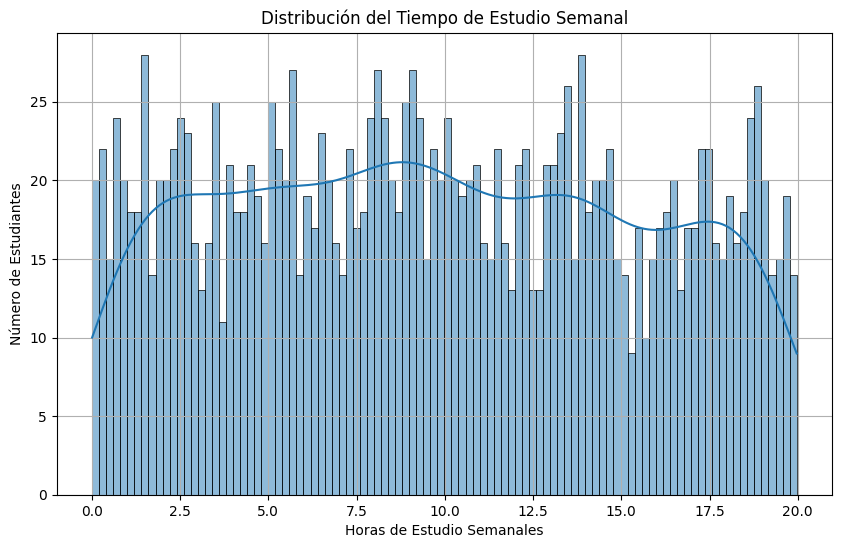

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

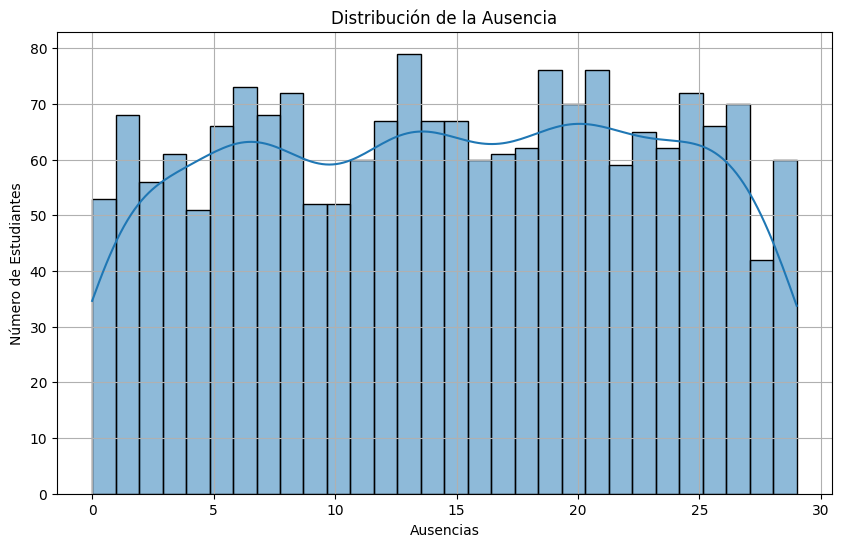

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

In [51]:
scaler = StandardScaler() # Escalamos las features numéricas para su mejor visualización
X_train[variables_numericas] = scaler.fit_transform(X_train[variables_numericas])

In [52]:
X_train[variables_numericas].describe()

,StudyTimeWeekly,Absences
count,1.913000e+03,1.913000e+03
mean,9.192856e-17,-2.228571e-17
std,1.000261e+00,1.000261e+00
min,-1.708474e+00,-1.723237e+00
25%,-8.401381e-01,-8.980672e-01
50%,-4.028255e-02,4.498347e-02
75%,8.171785e-01,8.701528e-01
max,1.792568e+00,1.695322e+00


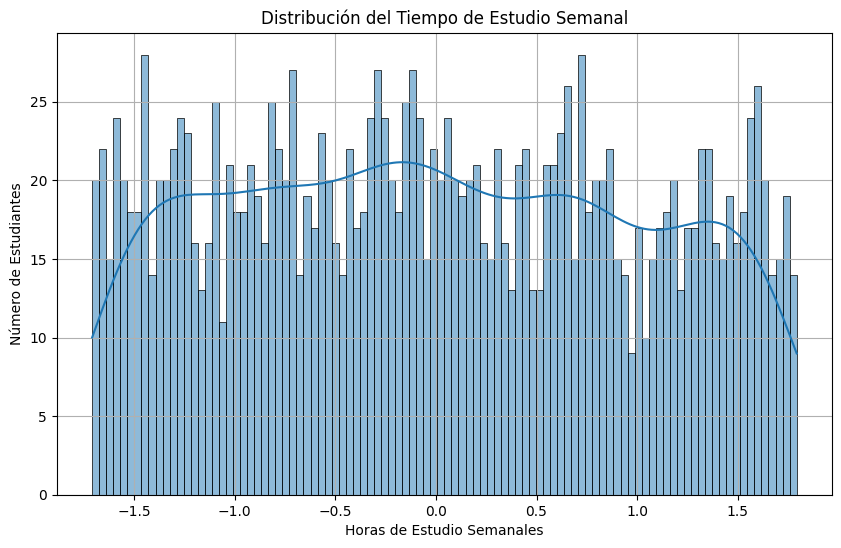

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

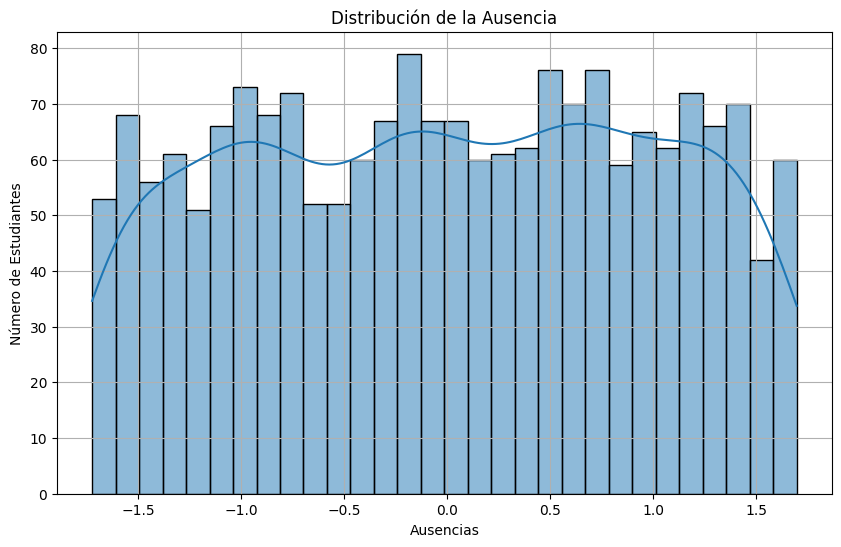

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

In [59]:
X_train[['StudyTimeWeekly','Absences']]

,StudyTimeWeekly,Absences
642,1.468159,1.105915
1752,-1.276773,0.516509
1401,-1.103632,1.223797
2032,1.068117,1.223797
990,-1.526524,0.516509
...,...,...
1638,0.586521,-0.190779
1095,-1.331151,0.516509
1130,-1.083254,-0.072898
1294,-0.937671,0.634390


In [60]:
y_train

642     F
1752    F
1401    F
2032    F
990     F
       ..
1638    F
1095    F
1130    D
1294    F
860     F
Name: GradeClass, Length: 1913, dtype: object

In [66]:
df_num=X_train[['StudyTimeWeekly','Absences']]
df_num_target=pd.concat([df_num,y_train], axis=1, ignore_index=True)
df_num_target = df_num_target.rename(columns={0: 'StudyTimeWeekly', 1: 'Absences', 2: 'GradeClass'})
df_num_target

,StudyTimeWeekly,Absences,GradeClass
642,1.468159,1.105915,F
1752,-1.276773,0.516509,F
1401,-1.103632,1.223797,F
2032,1.068117,1.223797,F
990,-1.526524,0.516509,F
...,...,...,...
1638,0.586521,-0.190779,F
1095,-1.331151,0.516509,F
1130,-1.083254,-0.072898,D
1294,-0.937671,0.634390,F


In [72]:
from sklearn.feature_selection import f_classif
anova_f_values, p_values = f_classif(df_num, y_train)
anova_results = pd.Series(anova_f_values, index=df_num.columns).sort_values(ascending=False)
print(anova_results)
print()
print(p_values)

Absences           715.740575
StudyTimeWeekly      9.804481
dtype: float64

[7.5150125e-08 0.0000000e+00]


## Catergorical features

In [73]:
variables_categoricas

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering']

### Definimos las siguientes funciones para la visualización de las features categoricas en función de la variable de target para decidir si finalmente son útiles o no en el modelo de clasificación.

In [74]:
def plot_cat(ax, df, variable):
    counts = df[variable].value_counts().reset_index()
    counts.columns = [variable, 'Frequency']
    print(f"Value counts for {variable}:\n{counts}\n")
    
    sns.barplot(x=variable, y='Frequency', hue=variable, data=counts, dodge=False, palette='viridis', ax=ax)
    ax.set_title(f'Distribución de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    
    # Frecuencia encima de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Añadir leyenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title=variable, loc='upper right')

In [75]:
def plot_categorical_vs_target(ax, df, target:pd.Series, categorical_var):
    crosstab = pd.crosstab(df[categorical_var], target)
    crosstab = crosstab.div(crosstab.sum(axis=1), axis=0) * 100 # para verlo como porcentaje
    crosstab.plot(kind='bar', stacked=True, ax=ax, figsize=(10,6))
    ax.set_xlabel(f'{categorical_var}')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Distribution of {target.name} Based on {categorical_var}')
    ax.legend(title='Target')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=10, color='white')

In [76]:
from IPython.display import display, Markdown

def describir_cat(df: pd.DataFrame, variables_categoricas: list, target: pd.Series):
    for variable_categorica in variables_categoricas:
        display(Markdown(f"# Para la variable **{variable_categorica}**"))
        fig, axes = plt.subplots(1, 2, figsize=(25, 6))
        
        # Llamar a plot_cat y plot_categorical_vs_target pasando los ejes correspondientes
        plot_cat(axes[0], df, variable_categorica)
        plot_categorical_vs_target(axes[1], df, target, variable_categorica)
        
        plt.tight_layout()
        plt.show()

# Para la variable **Age**

Value counts for Age:
   Age  Frequency
0   15        511
1   16        479
2   17        462
3   18        461



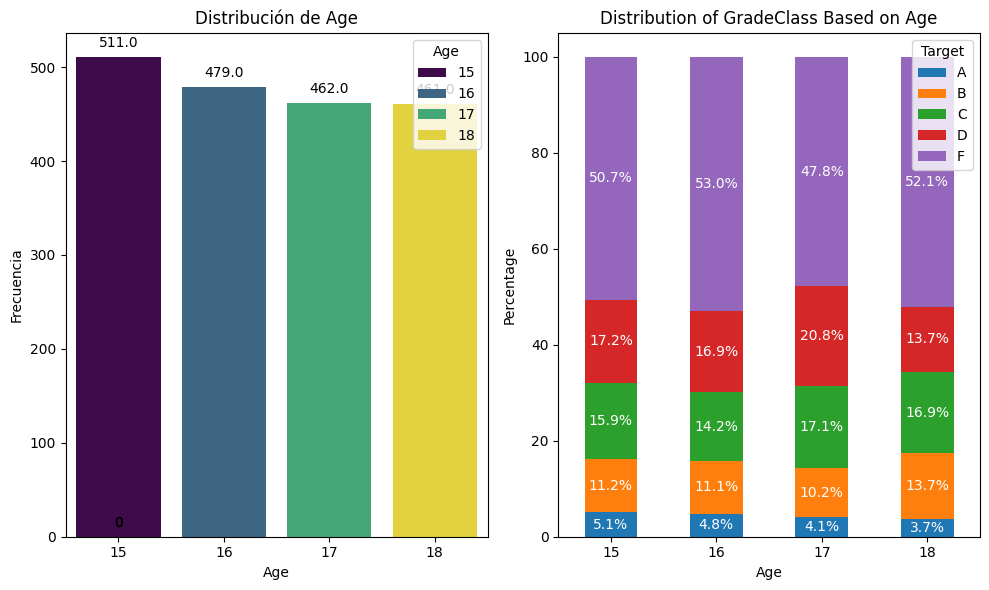

# Para la variable **Gender**

Value counts for Gender:
   Gender  Frequency
0  Female        984
1    Male        929



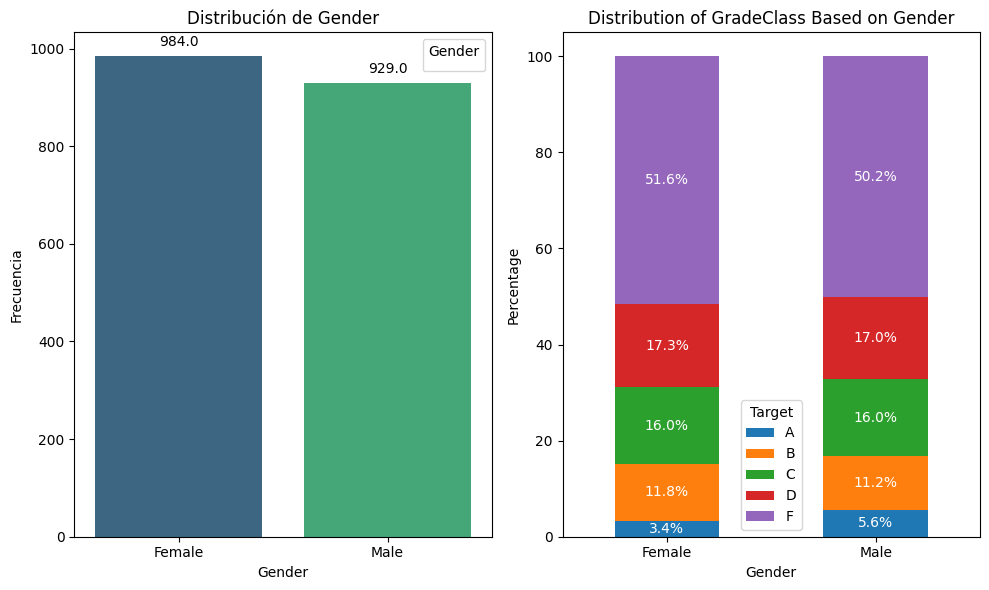

# Para la variable **Ethnicity**

Value counts for Ethnicity:
          Ethnicity  Frequency
0         Caucasian        975
1  African American        386
2             Asian        372
3             Other        180



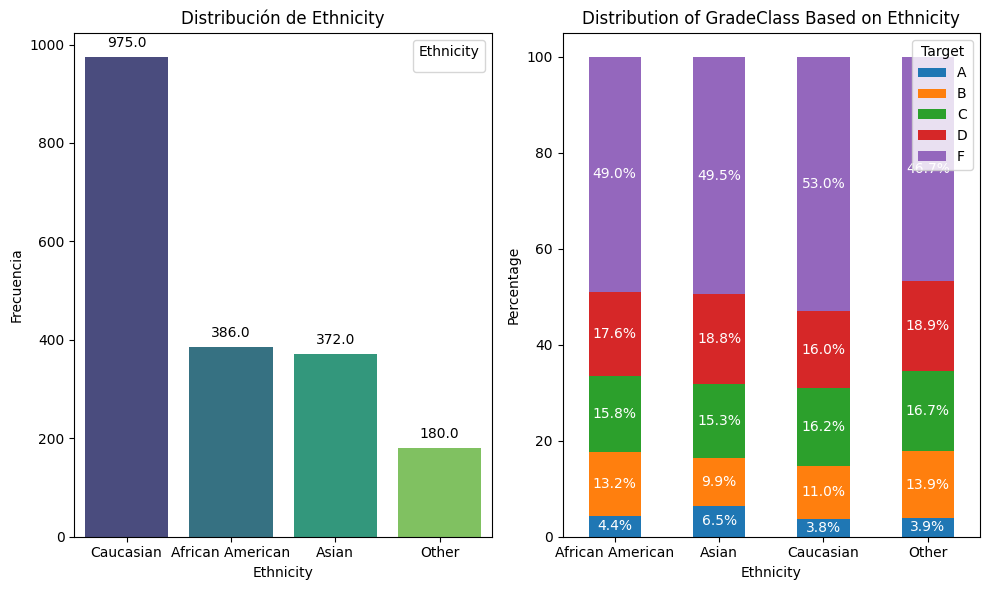

# Para la variable **ParentalEducation**

Value counts for ParentalEducation:
  ParentalEducation  Frequency
0      Some College        757
1       High School        576
2        Bachelor's        307
3              None        182
4            Higher         91



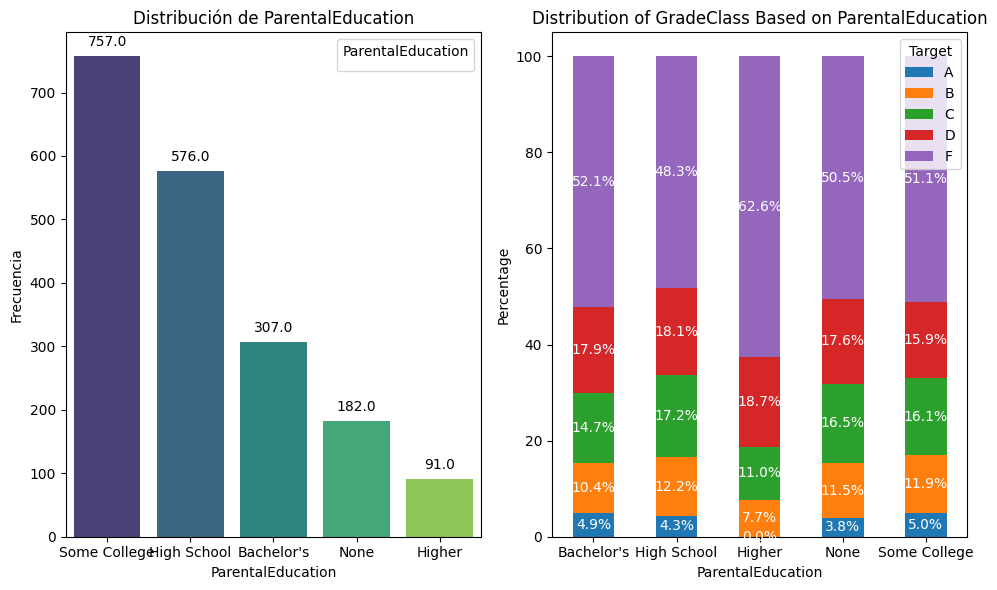

# Para la variable **Tutoring**

Value counts for Tutoring:
   Tutoring  Frequency
0         0       1335
1         1        578



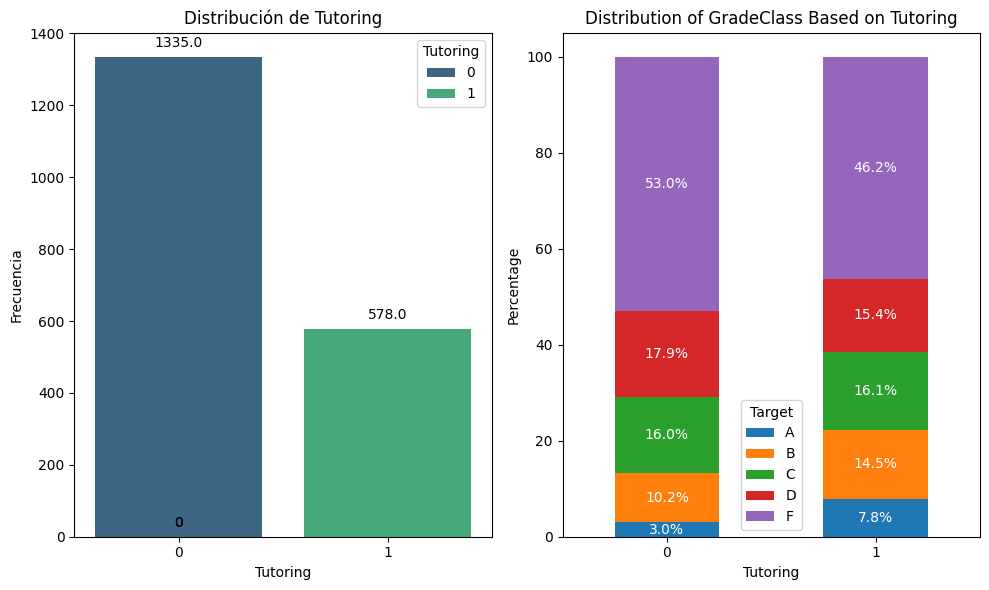

# Para la variable **ParentalSupport**

Value counts for ParentalSupport:
  ParentalSupport  Frequency
0        Moderate        597
1            High        560
2             Low        385
3       Very High        209
4            None        162



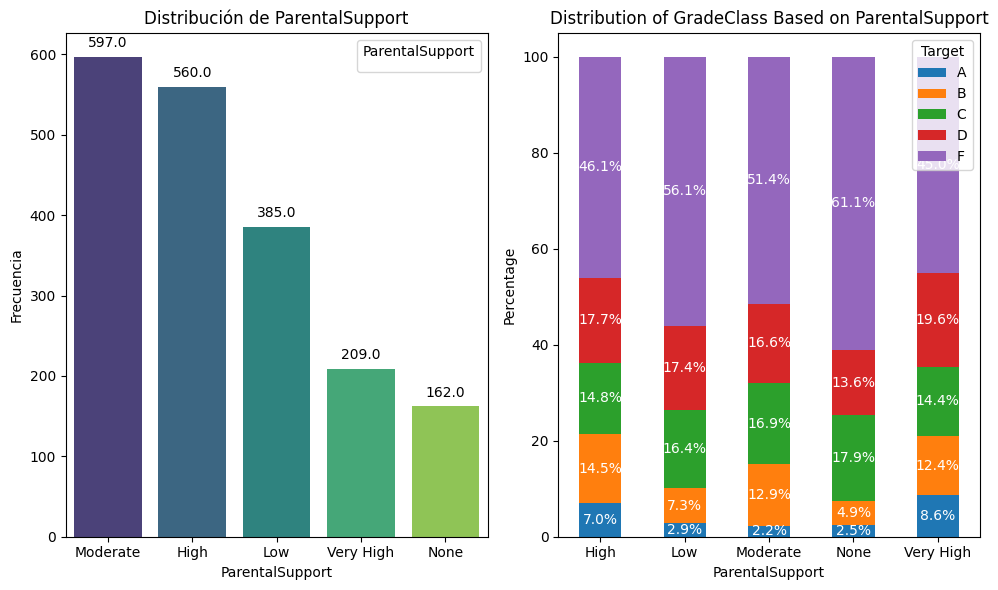

# Para la variable **Extracurricular**

Value counts for Extracurricular:
   Extracurricular  Frequency
0                0       1186
1                1        727



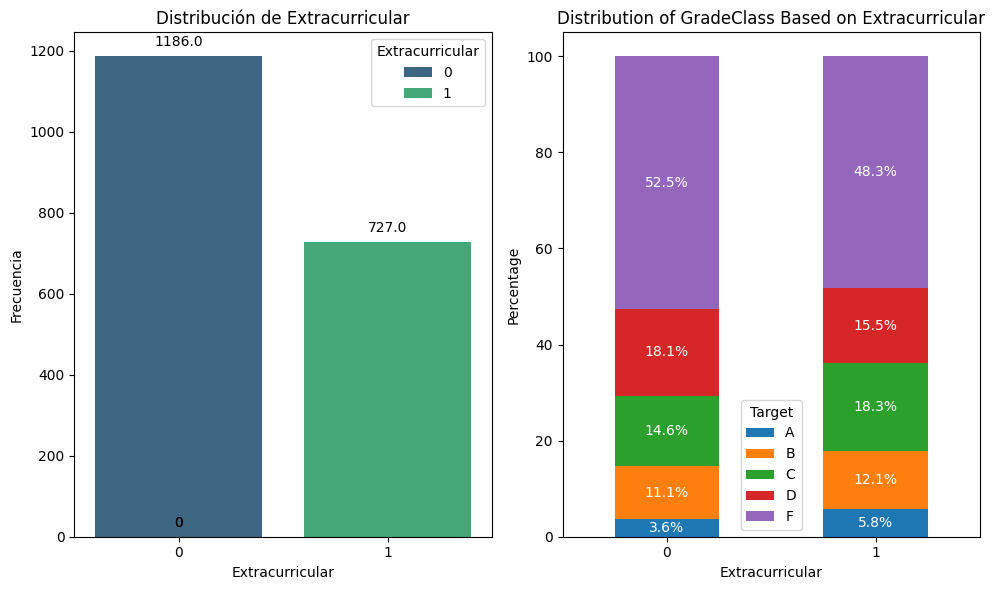

# Para la variable **Sports**

Value counts for Sports:
   Sports  Frequency
0       0       1330
1       1        583



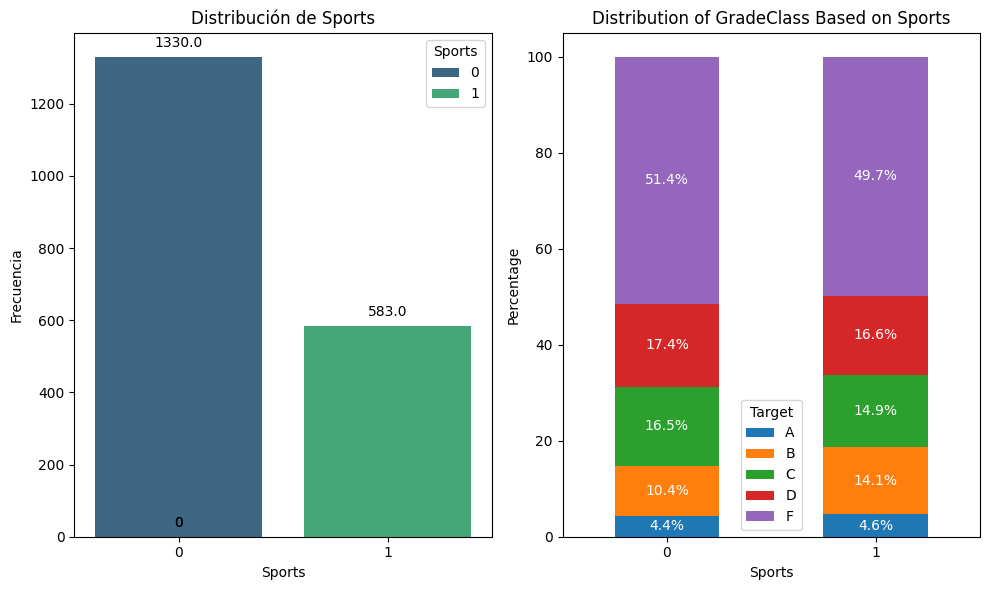

# Para la variable **Music**

Value counts for Music:
   Music  Frequency
0      0       1534
1      1        379



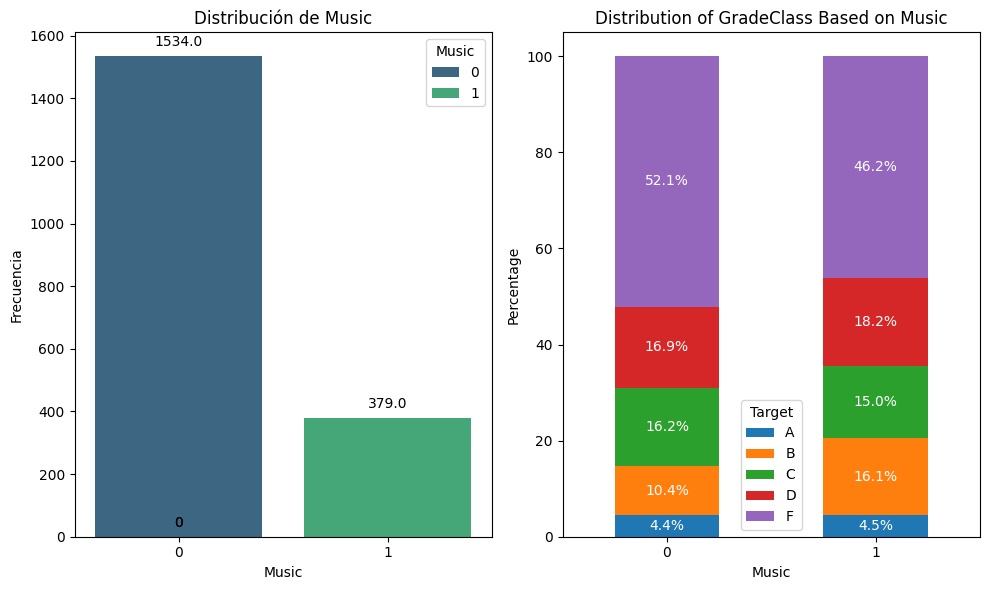

# Para la variable **Volunteering**

Value counts for Volunteering:
   Volunteering  Frequency
0             0       1614
1             1        299



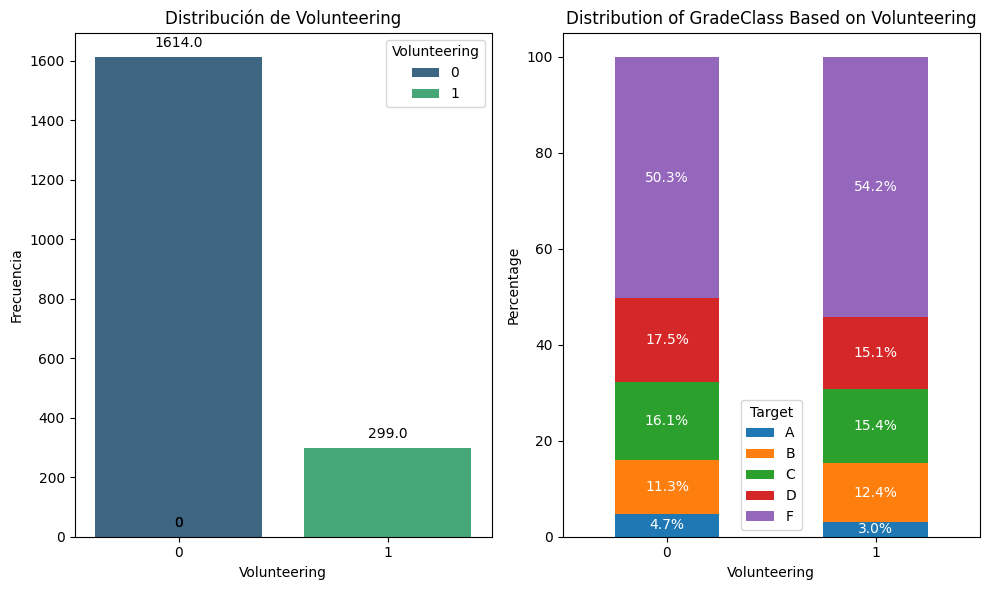

In [77]:
describir_cat(X_train,variables_categoricas,y_train)

# Viendo los resultados, parece que tiene sentido excluir la feature Gender. Igual también la feature Age.

In [ ]:
X = pd.read_csv('data\clean_data\clean_features.csv')
y = pd.read_csv('data/clean_data/clean_target_gradeClass.csv')['GradeClass']

In [86]:
variables_numericas=['StudyTimeWeekly','Absences']
variables_categoricas=[i for i in X.columns if i not in variables_numericas]
del variables_categoricas[1]


In [87]:
variables_numericas

['StudyTimeWeekly', 'Absences']

In [88]:
variables_categoricas

['Age',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering']

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, variables_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['StudyTimeWeekly',
                                                   'Absences']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Age', 'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [100]:
y_pred = pipeline.predict(X_test)

In [101]:
report_dict = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convertir el diccionario en un DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Mostrar el DataFrame
print(report_df)

              precision    recall  f1-score     support
A              0.666667  0.181818  0.285714   22.000000
B              0.540000  0.551020  0.545455   49.000000
C              0.519481  0.470588  0.493827   85.000000
D              0.410256  0.372093  0.390244   86.000000
F              0.813433  0.919831  0.863366  237.000000
accuracy       0.670146  0.670146  0.670146    0.670146
macro avg      0.589967  0.499070  0.515721  479.000000
weighted avg   0.654171  0.670146  0.653794  479.000000


              precision    recall  f1-score     support
A              0.666667  0.181818  0.285714   22.000000
B              0.540000  0.551020  0.545455   49.000000
C              0.519481  0.470588  0.493827   85.000000
D              0.410256  0.372093  0.390244   86.000000
F              0.813433  0.919831  0.863366  237.000000
accuracy       0.670146  0.670146  0.670146    0.670146
macro avg      0.589967  0.499070  0.515721  479.000000
weighted avg   0.654171  0.670146  0.653794  479.000000


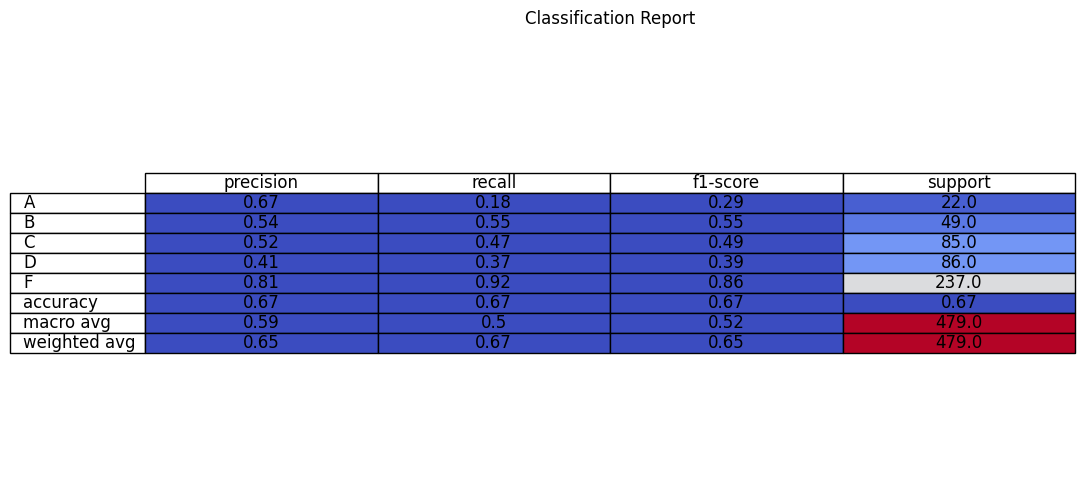

In [102]:
# Obtener el classification report como diccionario
report_dict = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convertir el diccionario en un DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Mostrar el DataFrame
print(report_df)

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Crear una tabla usando matplotlib
table = plt.table(cellText=np.round(report_df.values, 2),
                  colLabels=report_df.columns,
                  rowLabels=report_df.index,
                  cellLoc='center',
                  loc='center',
                  cellColours=plt.cm.coolwarm(report_df.values / report_df.values.max()))

# Ajustar la visualización
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.axis('off')  # Desactivar ejes
plt.title('Classification Report')
plt.show()

#### Los resultados indican, como era de esperar, que el modelo de regresión lineal es mejor y mucho más correcto en este contexto ya que el modelo de clasificación se fundamenta en datos que han sido clasificados de manera brusca. Por tanto, se hará un analisis más exhaustivo del modelo lineal y será este el utilizado en la presentación.